# Individual Assignment M5.1: General Widget Corporation (extracted from the textbook)

-------------------------------------------------------------------------
* Daniel Lesh
* djl17006

## Problem statement

General Widget Corporation has collected data on the daily output and daily production cost of widgets at its factory. The company believes that daily output ($DO$) and daily production cost ($PC$) ought to be linearly related.  Thus, for some numbers $a$ and $b$:
$
PC = a + b  \times DO
$
Data for the study are provided below:

Day	| DO	| PC
--- | --- | ---
1	| 5,045	| 2,542
2	| 6,127	| 2,812
3	| 6,360	| 2,776
4	| 6,645	| 3,164
5	| 7,220	| 4,102
6	| 9,537	| 4,734
7	| 9,895	| 4,238
8	| 10,175	| 4,524
9	| 10,334	| 4,869
10 |	10,855	|4,421

**Directions:** 
You may work with your fellow classmates, but you need to complete the assignment on your own. I expect different headers and COMMENTS (comments are the key to showing that you really know your stuff - without comments, your code is useless to me).

**Rubric:**
* Each item corresponds to 50% of the grade:
  * Full credit (100): Correct formulation and lots of useful comments. Nice headers and text cells included in the notebook.
  * Half credit (50): Solution is wrong (bad code) or the comments are mediocre or directly copied. Nice headers and text cells included in the notebook.
  * No credit (0): Bad code and bad comments, or good code and no comments. Poorly laid out notebook.


## Mount Personal Google Drive

In [1]:
# Mounting my personal Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Seperate / Organize Data 

In [15]:
## Before building model, seperate the data given by creating these new variables (Y & Z)
  # Each data input is separated by a comma 

# Day Variable Inputs (A) 
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Daily Output (DO) --> Independent Variable
  # DO Variable Inputs - (Y)
Y = [
     5045,
     6127,
     6360,
     6645,
     7220,
     9537,
     9895,
     10175,
     10334,
     10855
          ]

## Daily Production Costs (PC) --> Dependent Variable
  # PC Variable Inputs - (Z)
Z = [
     2542,
     2812,
     2776,
     3164,
     4102,
     4734,
     4238,
     4524,
     4869,
     4421
          ]

## Import Python Plotting Packages / Plot Data

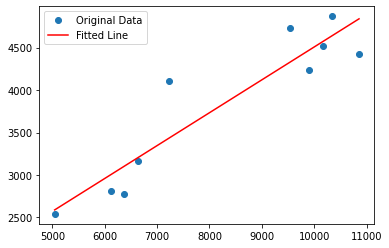

a value: 635.9745463519116
b value: 0.38716502057937885


In [16]:
# Import Python Plotting Packages 
%matplotlib inline
from pylab import *

import matplotlib.pyplot as plt 
from scipy import stats

# Convert our lists into numpy arrays using scipy 
YY = np.array(Y) # Converting array of data for Y to = YY
ZZ = np.array(Z) # Converting array of data for Z to = ZZ

# Returning first two values in the function: b & a
b, a, r_value, p_value, std_err = stats.linregress(YY, ZZ) # Running linear regression on YY and ZZ

## Plot the original data points provided in the problem above: 
  # Variables: DO = YY ; PC = ZZ
plt.plot(YY, ZZ, 'o', label= 'Original Data') # Plotting YY and ZZ data points, labeling it 'Original Data'

## Plot the line on graph using plot function
  # Utilizing linear regression expression ('a + b*YY') in the plot function
plt.plot(YY, a + b*YY, 'r', label= 'Fitted Line')
plt.legend() # Using legend function to generate legend in upper left corner 
plt.show() # Using show function to show plot 

# Print values of a and b (we will need this later to compare to our optimized solution)!
print ('a value:', a) # Printing Value a
print ('b value:', b) # Printing Value b 

## Import Python Optimization Packages

In [17]:
# Import Python Optimization Packages to run code properly
%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("ipopt") or os.path.isfile("ipopt")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        #!apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

# Item 1 

Build a least-squares model to estimate the parameters $a$ and $b$ in the linear relationship.  In other  words, minimize the sum of squared differences between the model's predicted values and the observations, i.e., the objective function will probably look like this:

$\min   \sum\limits_{i \in |X|}(y_i - z_i)^2$

What are the best values of the parameters $a$ and $b$ for this criterion? What is the minimum value of the objective function? 

**Optimal (?) solution $a = 635.97$ and $b = 0.39$, and optimal (?) value is 1,044,322.762.**
	


## Program Model1 Solution (i.e. Least-Squares Model)

In [18]:
# Before building model1, declare it using 'model = ConcreteModel()' function
model1 = ConcreteModel()

### Count of variables in the data column
  ## When we use the function to count it will come up with [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
    # Number 9 indicating 10 variables (0 included)
n_points = len(X)

# Declare the decision variables in the model
model1.a = Var(domain=Reals, initialize = 1) # Intialize = 1 to Model A 
model1.b = Var(domain=Reals, initialize = 1) # Intialize = 1 for Model B 
  # Build a range for the variable inputs to follow for Model Z
model1.z = Var([i for i in range(n_points)], domain=Reals) # This also helps with the progression of the formula, meaning it will work down each variable input to find a final solution

# Build out constraints in Model 
model1.constraints = ConstraintList() 
for i in range(n_points): # Clarify the range that the constraints are subject to (for i in range) --> Predicted Value
  y = Y[i] ### The daily output is defined as y but set to the range of Y (DO) in the data variable inputs above
            ## Each new section of the formula will pull the next value of Y in the variable column
              # This is how it is able to switch the input
  model1.constraints.add(model1.z[i] == model1.a + y*model1.b) ## There is a linear relationship between Product Cost and Daily Output
                                                            # This formula builds that constraint for the objective function to follow
# Objective Statement for minimimum value
obj_expr = 0 # Setting objective for minimum value of 0
for i in range(n_points):
  obj_expr += (model1.z[i] - Z[i])**2 # The sum of each variable (i) 
model1.error = Objective(
                      expr = obj_expr, # Carry the objective formula into the proposed solution
                      sense = minimize) # Expression notifying the objective is to minimize problem

# Printing Model Solution
model1.pprint() # Also using Pretty Print function  here 

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    z_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

3 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    z : Size=10, Index=z_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None

## Find Solution for Model1

In [19]:
# Solve the Objective Function for Model1! 
SolverFactory('ipopt', executable='/content/ipopt').solve(model1).write()

# Print the results so they are easier to see and read!
print("Objective Value = ", model1.error()) # Printing Objective Function Value 
print("A = ", model1.a()) # Printing Model A Value
print("B = ", model1.b()) # Printing Model B Value
a = model1.a() # a = Model1 A
b = model1.b() # b = Model1 B

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 12
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.01985335350036621
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Objec

## Plot the Curve / Compare to Plot Generated Above

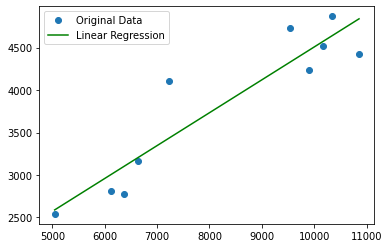

a value: 635.9745463519116
b value: 0.38716502057937885


In [20]:
## Plot the original data points provided in the problem above: 
  # Variables: DO = YY ; PC = ZZ
plt.plot(YY, ZZ, 'o', label= 'Original Data') # Plotting YY and ZZ, labeling it 'Original Data'

## Plot the line on graph using plot function
  # Utilizing linear regression expression ('a + b*YY' ) in the plot function
plt.plot(YY, a + b*YY, 'g', label= 'Linear Regression')
plt.legend() # Using legend function to generate legend in left-hand corner 
plt.show() # Using show function to show plot 

# To confirm graph matches solutions provided, print values of a and b!
print('a value:', a) # Printing Value a
print('b value:', b) # Printing Value b 

## Model1 Solutions Output (Matches Provided Answers)


Linear Regression Equation: 

$PC = 635.97 +0.39(DO)$
* Objective Value = 1,044,322.762
* A = 635.97
* B = 0.39









# Item 2


Suppose, instead, that a better model than the linear model is thought to be the power function

$
PC = a(DO)^b.
$

Using the sum of squared differences, what values of $a$ and $b$ provide the best fit?  What is the minimum value of the objective function? 

**Try to start from $a = 1$ and $b = 1$.**
		
**Optimal (?) solution $a = 2.44$ and $b = 0.82$, and optimal (?) value is 1,012,813.84.**




## Program Model2 Solution (i.e. Polynomial Regression Model)

In [12]:
# Before building model2, declare it using 'model = ConcreteModel()' function
model2 = ConcreteModel()

### Count of variables in the data column
  ## When we use the function to count it will come up with [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
    # Number 9 indicating 10 variables (0 included)
n_points = len(X)

# Declare the decision variables in Model2
model2.a = Var(domain=Reals,initialize = 1) # Intialize = 1 to Model2 A 
model2.b = Var(domain=Reals, initialize = 1) # Intialize = 1 to Model2 B 
 # Build a range for the variable inputs to follow for Model2 Z
model2.z = Var([i for i in range(n_points)],domain=Reals) # This also helps with the progression of the formula, meaning it will work down each variable input to find a final solution
# Build out constraints in Model2
model2.constraints = ConstraintList()

# Predicted value in Model 2 (similar to model above)
for i in range(n_points): # Clarify the range that the constraints are subject to (for i in range)
  y = Y[i] ### The daily output is defined as y but set to the range of Y (DO) in the data variable inputs above
            ## Each new section of the formula will pull the next value of Y in the variable column
              # This is how it is able to switch the input
  model2.constraints.add(model2.z[i] == model2.a * y**(model2.b)) ## There is a linear relation between Product Cost and Daily Output
                                                                    # This formula builds that constraint for the objective function to follow

# Objective Statement for minimimum value - Here we want the minimal value with respect to the constraints that we created above
obj_expr = 0 # Setting objective for minimum value of 0
for i in range(n_points):
  obj_expr += (model2.z[i] - Z[i])**2 # Formula that addresses the sum of the values of each progressive variable in both columns Y and their respective variable in Z
model2.error = Objective(
                      expr = obj_expr, # Carry the objective formula into the proposed solution
                      sense = minimize) # Minimizing the objective

# Printing Model Solution
model2.pprint() # Using Pretty Print function also here 

2 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    z_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

3 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    z : Size=10, Index=z_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None

## Solve Solution for Model2

In [13]:
# Solve the Objective Function for Model2! 
SolverFactory('ipopt', executable='/content/ipopt').solve(model2).write()

# Print the results so they are easier to see and read!
print("Objective value = ", model2.error()) # Printing Objective Function Value 
print("A = ", model2.a()) # Printing Model2 A Value
print("B = ", model2.b()) # Printing Model2 B Value
a2 = model2.a() # Set a2 to equal model2.a 
b2 = model2.b() # Set b2 to equal model2.b 

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 12
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.022488832473754883
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Obje

## Plot the Curve / Compare Power and Linear Regressions

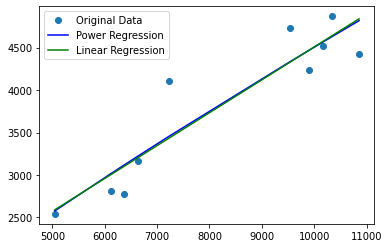

a value: 2.4406061627415148
b value: 0.8165412847935575


In [14]:
## Plot the original data points provided in the problem above: 
  # Variables: DO = YY ; PC = ZZ
plt.plot(YY, ZZ, 'o', label= 'Original Data') # Plotting YY and ZZ, labeling it 'Original Data'

### Plot the line on graph using plot function
  ## Utilizing power regression expression ('a2*yy**b2') in the plot function
    # Also utilizing linear regression expression ('a + b*YY' ) in the plot function
plt.plot(YY, a2*YY**b2, 'b', label= 'Power Regression')
plt.plot(YY, a + b*YY, 'g', label= 'Linear Regression')
plt.legend() # Using legend function to generate legend in left-hand corner 
plt.show() # Using show function to show plot 

# To confirm graph matches solutions provided, print values of a and b!
print ('a value:', a2) # Printing Value a2 from model 2
print ('b value:', b2) # Printing Value b2 from model 2

## Model2 Solutions Output (Matches Provided Answers)


Power Regression Equation: 

$PC = 2.44 (DO) ^ .82$
* Objective Value = 1,012,813.84
* A = 2.44
* B = 0.82